In [1]:
pip install pandas numpy tensorflow scikit-learn


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf

# Load the Titanic dataset
data = pd.read_csv('/content/titanic.csv')

# Data Preprocessing
# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])  # Male: 1, Female: 0

le_embarked = LabelEncoder()
data['Embarked'] = le_embarked.fit_transform(data['Embarked'])  # S: 2, C: 0, Q: 1

# Features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert labels to categorical for TensorFlow
y_train_categorical = tf.keras.utils.to_categorical(y_train, 2)
y_test_categorical = tf.keras.utils.to_categorical(y_test, 2)

# Build the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Display predictions vs actual values
print("Sample Predictions:")
print("Predicted:", predicted_classes[:10])
print("Actual:   ", y_test[:10].values)


<ipython-input-3-25e113688fd0>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-3-25e113688fd0>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5708 - loss: 0.6937 - val_accuracy: 0.7133 - val_loss: 0.5807
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6976 - loss: 0.5871 - val_accuracy: 0.7832 - val_loss: 0.5042
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7430 - loss: 0.5547 - val_accuracy: 0.8252 - val_loss: 0.4592
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7476 - loss: 0.5252 - val_accuracy: 0.8252 - val_loss: 0.4320
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8266 - loss: 0.4489 - val_accuracy: 0.8252 - val_loss: 0.4139
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7599 - loss: 0.5138 - val_accuracy: 0.8042 - val_loss: 0.4103
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7876 - loss: 0.4656 - val_accuracy: 0.8252 - val_loss: 0.4021
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8056 - loss: 0.4528 - val_accuracy: 0.8182 - val_loss

In [4]:
pip install matplotlib seaborn


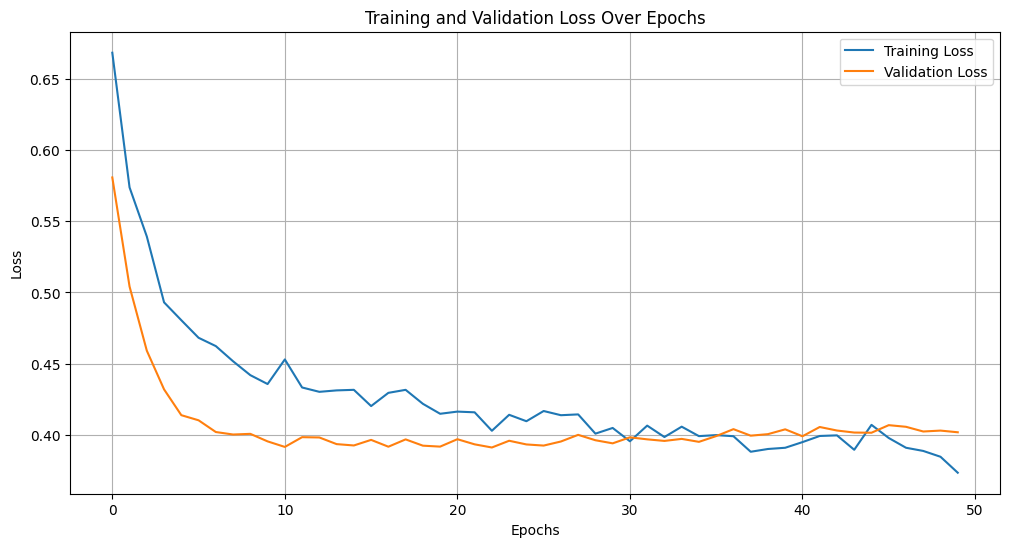

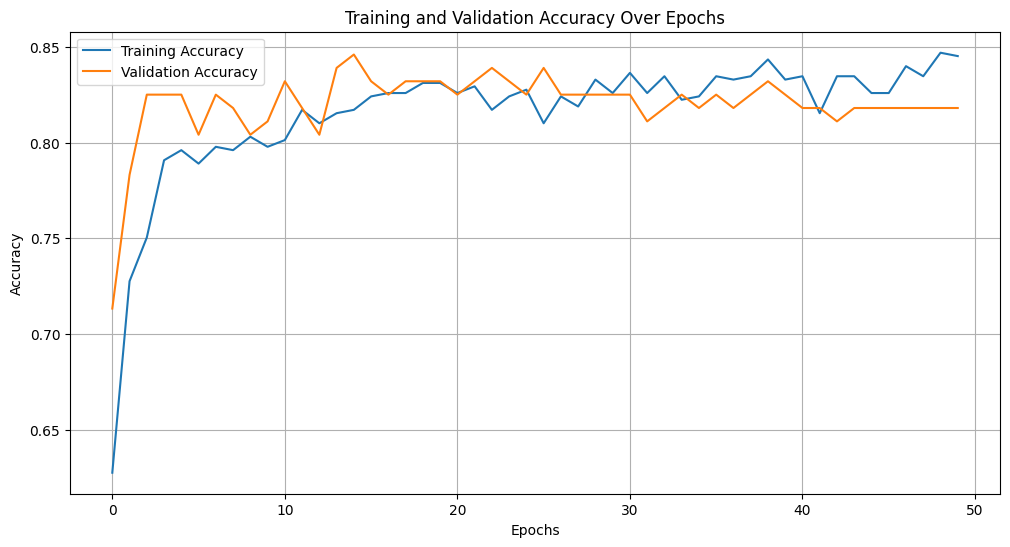

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


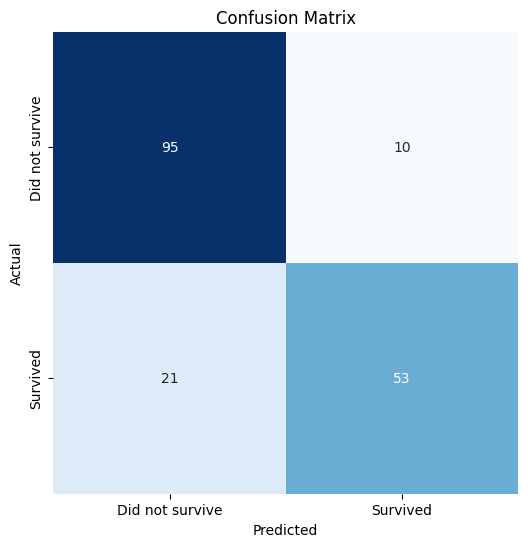

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Visualizing the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [6]:

# Example of manually inputted passenger data
# Values are: Pclass, Sex (1 = male, 0 = female), Age, SibSp, Parch, Fare, Embarked (0, 1, 2)
new_passenger = {
    'Pclass': 1,        # Passenger class (1st class)
    'Sex': 0,           # Female
    'Age': 25,          # Age of the passenger
    'SibSp': 1,         # 1 sibling/spouse aboard
    'Parch': 0,         # No parents/children aboard
    'Fare': 80,         # Fare paid by the passenger
    'Embarked': 2       # Embarked from Southampton
}

# Convert to DataFrame for consistency
new_passenger_df = pd.DataFrame([new_passenger])

# Scale the input using the same scaler used for training
new_passenger_scaled = scaler.transform(new_passenger_df)

# Predict the survival
prediction = model.predict(new_passenger_scaled)

# Determine the predicted class (0 = Did not survive, 1 = Survived)
survived = np.argmax(prediction, axis=1)[0]

# Output the prediction
print("Predicted Survival Status:", "Survived" if survived == 1 else "Did not survive")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Survival Status: Survived
